In [1]:
from Chandan_Library_midsem import *


# Basic Functions

In [2]:
# Factorial of a number
n = 5
print(FACTORIAL(n))

# Sine of a number
n = math.pi/6
print(SINE(n, 50))

# Exponential of a number
n = 5
print(EXP(n, 50))

# Round off a number
n = 5.6786835279
print(ROUND(n, 5))

def f(x):
    return x**2
x = 3

# Derivative of a function
print(derivative(f, x))
# Double derivative of a function
print(double_derivative(f, x))

120
0.49999999999999994
0.006737946999086907
5.67868
5.999999963535174
1.999999987845058


# Root Finding

In [3]:
def f1(x):
    return -1*math.cos(x)-x

eps=10**-8

p=1.6
q=2.4
a,b=bracketing(f1, p, q)

print("\nBISECTION METHOD")
root=bisection(f1, a, b)
if p==a and q==b:
    print("Root of the given function in the interval (" + str(p) + "," + str(q) + ") = "+str(root))
else:
    print("Root does not lie in the given range (" + str(p) + "," + str(q)+")")
    print("We change the interval to (" + str(a) + "," + str(b)+")")
    print("Root of the given function in the interval (" + str(a) + "," + str(b) + ") is "+str(root))

#######################################################################################################

print("\nREGULA FALSI METHOD")
root=regula_falsi(f1, a, b)
if p==a and q==b:
    print("Root of the given function in the interval (" + str(p) + "," + str(q) + ") = "+str(root))
else:
    print("Root does not lie in the given range (" + str(p) + "," + str(q)+")")
    print("We change the interval to (" + str(a) + "," + str(b)+")")
    print("Root of the given function in the interval (" + str(a) + "," + str(b) + ") is "+str(root))

#######################################################################################################

print("\nNEWTON RAPHSON METHOD")
x=2   ## guess value
root=newton_raphson(f1, x)
print("Nearest root of the given function for the given value of x = " + str(x) + " is = "+str(root))

#######################################################################################################

def g1(x):
    return math.exp(-x)

initial_guess = 1.0
eps=1e-6
root, Num_iter = fixed_point_method(g1, initial_guess, eps)

print("\nFIXED POINT METHOD")
print(f"Root of the given equation: {ROUND(root, 4)}")
print(f"Number of iterations performed: {Num_iter}")

#######################################################################################################

coeff=[1,0,-5,0,4]              # not working for guess = 0 (given in this assignment)

n=len(coeff)
guess = 1.2

print("\nSOLUTION OF POLYNOMIAL EQUATION USING LAGUERRE'S METHOD")
print("Solutions of the polynomial equation are:")
root = poly_solution(coeff, guess)
for i in range (len(root)):
    print(root[i], end='\t\t')



BISECTION METHOD
Root does not lie in the given range (1.6,2.4)
We change the interval to (-0.9417985355325205,2.4)
Root of the given function in the interval (-0.9417985355325205,2.4) is -0.7390846225686694

REGULA FALSI METHOD
Root does not lie in the given range (1.6,2.4)
We change the interval to (-0.9417985355325205,2.4)
Root of the given function in the interval (-0.9417985355325205,2.4) is -0.7390851312265575

NEWTON RAPHSON METHOD
Nearest root of the given function for the given value of x = 2 is = -0.7390851332151607

FIXED POINT METHOD
Root of the given equation: 0.5671
Number of iterations performed: 25

SOLUTION OF POLYNOMIAL EQUATION USING LAGUERRE'S METHOD
Solutions of the polynomial equation are:
1.0		2.0		-0.9999999999999999		-2.0		

Root: -4.712328169580526


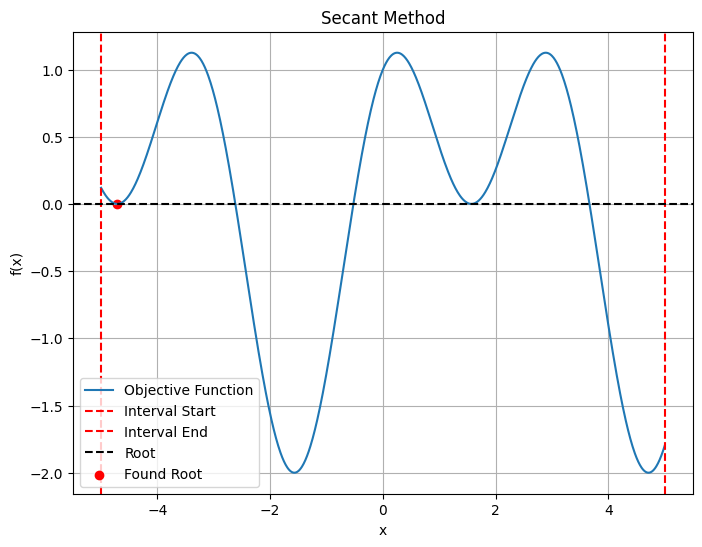

In [4]:
def objective_function(x):
    return np.sin(x) + np.cos(2 * x)


# Define the interval [a, b] within which to search for the root
a = -5
b = 5

# Perform the secant search
root = secant_method(objective_function, a, b)

print("Root:", root)


# Generate points for the function plot
x_vals = np.linspace(a, b, 1000)
y_vals = objective_function(x_vals)

# Plot the function and the root
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="Objective Function")
plt.axvline(a, color="red", linestyle="--", label="Interval Start")
plt.axvline(b, color="red", linestyle="--", label="Interval End")
plt.axhline(0, color="black", linestyle="--", label="Root")
plt.scatter(root, 0, color="red", label="Found Root")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Secant Method")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
import numpy as np

"""
Calculate the Jacobian matrix of a vector-valued function f at point x using numerical differentiation.

Parameters:
- f: The vector-valued function (takes a numpy array as input and returns a numpy array).
- x: The point at which to calculate the Jacobian.
- epsilon: The small perturbation for numerical differentiation.

Returns:
- J: The Jacobian matrix.
"""

def calculate_jacobian(f, x, epsilon=1e-8):
    n = len(x)
    J = np.zeros((len(f(x)), n))

    for i in range(n):
        x_perturbed = x.copy()
        x_perturbed[i] += epsilon
        J[:, i] = (f(x_perturbed) - f(x)) / epsilon
    return J

"""
Newton-Raphson method for finding a root of a vector-valued function in n dimensions.

Parameters:
- f: The vector-valued function (takes a numpy array as input and returns a numpy array).
- x0: Initial guess for the root.
- max_iterations: Maximum number of iterations.
- tolerance: Convergence tolerance.

Returns:
- x: The approximate root.
"""


def newton_raphson_n_dimensions(f, x, max_iterations=100, tolerance=1e-10):

    for iteration in range(max_iterations):
        # Calculate Jacobian matrix
        J = calculate_jacobian(f, x)

        # Calculate the update using matrix algebra
        delta_x = np.linalg.solve(J, -f(x))

        # Update the solution
        x += delta_x

        # Check for convergence
        if np.linalg.norm(delta_x) < tolerance:
            print(f"Converged in {iteration + 1} iterations.")
            return x

    print("Newton-Raphson did not converge.")
    return None



print("Multivariate Newton-Raphson method\n")
# pass two curves whose nearest intersection you want to find

# for example, x^2 + y^2 = 1 and x = 2y
def example_function(x):
    return np.array([x[0]**2 + x[1]**2 - 1, x[0]-2*x[1]])

initial_guess = np.array([1.0, 1.0])
root = newton_raphson_n_dimensions(example_function, initial_guess)

if root is not None:
    print("Approximate root:", root)


Multivariate Newton-Raphson method

Converged in 6 iterations.
Approximate root: [0.89442719 0.4472136 ]


# Numerical Integration

In [6]:
def f1(x):
    return math.sqrt(1+1/x)

eps=1e-8
a=1
b=4

# Calculating the actual value of integral

# N_mp = calculate_N_mp(f1,a, b, eps)
# N_t = calculate_N_t(f1, a, b, eps)
# N_s = calculate_N_s(f1, a, b, eps)

MP = int_mid_point(f1, a, b, eps)
TR = int_trapezoidal(f1, a, b, eps)
SMP = int_simpson(f1, a, b, eps)

print ("{:<25} {:<25} {:<25} {:<25}".format('Actual value', MP, TR, SMP))



print("\nGAUSSIAN QUADRATURE")
integral_gaussian, Num_iter_gaussian = Gaussian_quadrature(f1, a, b, eps)
print(f"Value of the integral by Gaussian quadrature: {ROUND(integral_gaussian, 6)}")
print(f"Number of iterations performed (order of P_n(x)): {Num_iter_gaussian}")


Actual value              3.6201842790315597        3.6201842825401687        3.6201842817160075       

GAUSSIAN QUADRATURE
Value of the integral by Gaussian quadrature: 3.620184
Number of iterations performed (order of P_n(x)): 8


It will take around 10-15 seconds
The value of the integral in the last iteration is = 3.1428864127805407


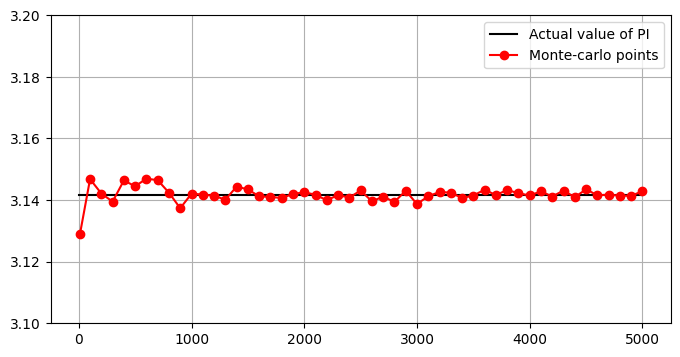

In [7]:
def f3(x):
    return 4/(1+x**2)

print("It will take around 10-15 seconds")
plt.figure(figsize=(8,4))

a=0
b=1
N=10

NN=[]
MC=[]
NN.append(N)
MC.append(int_monte_carlo(f3,pdf,a,b,N))


x=[0,5000]
y=[math.pi,math.pi]
plt.plot(x,y,'k-', label='Actual value of PI')

for N in range(100, 5001, 100):
    NN.append(N)
    MC.append(int_monte_carlo(f3,pdf,a,b,N))
plt.plot(NN,MC,'r-o', label='Monte-carlo points')
print("The value of the integral in the last iteration is = " + str(MC[-1]))


# One could also use N=10 and proceed with a step size of 10 as instructed
# in question 3 but that will not give any significant improvement. Hence 
# I made the plot with step size=100 upto 5000 taking a total of 50 points
# If one still wishes to use step-size = 10 and work for 100 points, then
# the following code should be used
'''
x=[0,500]
y=[math.pi,math.pi]
plt.plot(x,y,'r-', label='Actual value of PI')

for N in range(10, 501, 10):
    NN.append(N)
    MC.append(int_monte_carlo(f3,pdf,a,b,N))
plt.plot(NN,MC,'b-o', label='Monte-carlo points')
print("The value of the integral in the last iteration is = " + str(MC[-1]))
'''

plt.grid()
plt.ylim(3.1,3.2)
plt.legend()
plt.show()


# ODEs

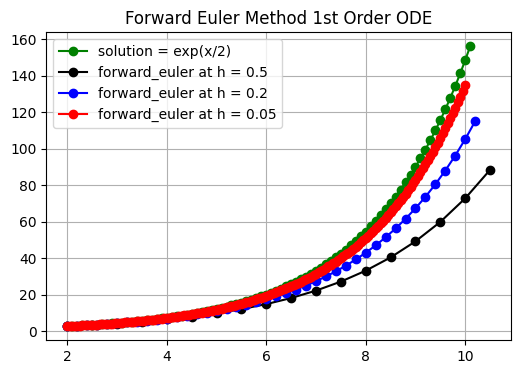

In [8]:
###NOW WE COME TO INITIAL VALUE PROBLEMS


def sol(x,y,h,lim):
    # Constructing solution arrays
    X=[x]
    Y=[y]
    while x<=lim:
        x+=h
        y=math.exp(x/2) # Solution function
        X.append(x)
        Y.append(y)
    return X,Y


def dydx1(x,y): # derivative function
    return y*math.log(y)/x


plt.figure(figsize=(6,4))
col=['k-o','b-o','r-o','y-o','g-o'] # Array for colors

h=0.1
lim=10


x=2
y=2.71828
X,Y=sol(x,y,h,lim)
plt.plot(X,Y,'g-o',label='solution = exp(x/2)')


h= [0.5, 0.2, 0.05]
x=2
y=2.71828
for i in range(len(h)):
    X,Y=forward_euler(x,y,h[i],lim,dydx1)
    plt.plot(X,Y,col[i],label='forward_euler at h = '+str(h[i]))

plt.title('Forward Euler Method 1st Order ODE')
plt.grid()
plt.legend()
plt.show()


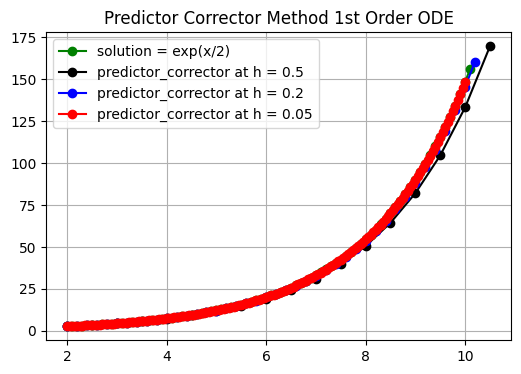

In [9]:

def sol(x,y,h,lim):
    # Constructing solution arrays
    X=[x]
    Y=[y]
    while x<=lim:
        x+=h
        y=math.exp(x/2) # Solution function
        X.append(x)
        Y.append(y)
    return X,Y


def dydx1(x,y): # derivative function
    return y*math.log(y)/x


plt.figure(figsize=(6,4))
col=['k-o','b-o','r-o','y-o','g-o'] # Array for colors

h=0.1
lim=10


x=2
y=2.71828
X,Y=sol(x,y,h,lim)
plt.plot(X,Y,'g-o',label='solution = exp(x/2)')


h= [0.5, 0.2, 0.05]
x=2
y=2.71828
for i in range(len(h)):
    X,Y=predictor_corrector(x,y,h[i],lim,dydx1)
    plt.plot(X,Y,col[i],label='predictor_corrector at h = '+str(h[i]))

plt.title('Predictor Corrector Method 1st Order ODE')
plt.grid()
plt.legend()
#plt.xlim(7.88,7.92)
#plt.ylim(44.5,45.5)
plt.show()


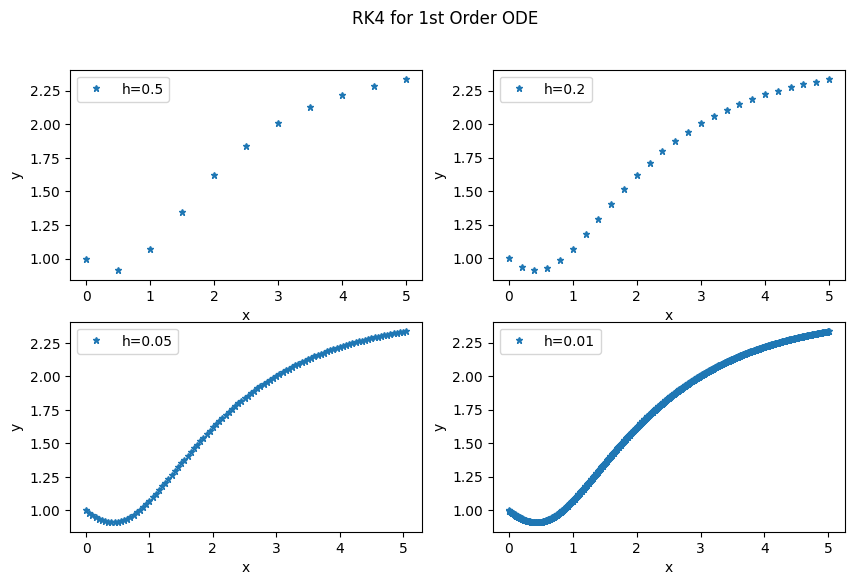

In [10]:
def dydx(x, y):
    return (5*x**2-y)/(math.exp(x+y))

x0 = 0.0
xn = 5.0
y0 = 1.0

h1 = 0.5
h2 = 0.2
h3 = 0.05
h4 = 0.01

X1, Y1 = ODE_1ord_RK4(dydx, y0, x0, xn, h1)
X2, Y2 = ODE_1ord_RK4(dydx, y0, x0, xn, h2)
X3, Y3 = ODE_1ord_RK4(dydx, y0, x0, xn, h3)
X4, Y4 = ODE_1ord_RK4(dydx, y0, x0, xn, h4)

# Plotting the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(X1, Y1, '*', label='h=0.5', markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# plt.grid()

plt.subplot(2, 2, 2)
plt.plot(X2, Y2, '*', label='h=0.2', markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# plt.grid()

plt.subplot(2, 2, 3)
plt.plot(X3, Y3, '*', label='h=0.05', markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# plt.grid()

plt.subplot(2, 2, 4)
plt.plot(X4, Y4, '*', label='h=0.01', markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# plt.grid()

plt.suptitle('RK4 for 1st Order ODE')
plt.show()



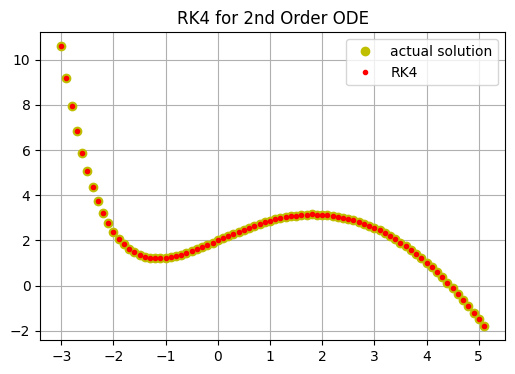

In [11]:

plt.figure(figsize=(6,4))
col=['k-o','b-o','r-o','y-o','g-o'] # Array for colors


def dydx_1(x,y,p):
    return p

def d2ydx2_1(x,y,p):
    return 1-x-p


def sol(x,y,h,l_bound,u_bound):
    x1=x
    y1=y
    X=[x]
    Y=[y]
    
    while x>=l_bound:
        x=x-h
        y=math.exp(-x)-x**2/2+2*x+1
        X.append(x)
        Y.append(y)

    while x1<=u_bound:
        x1=x1+h
        y1=math.exp(-x1)-x1**2/2+2*x1+1
        X.append(x1)
        Y.append(y1)
    
    return X,Y


x=0
y=2
h=0.1

# Bounds of x
lb=-3
ub=5

X,Y=sol(x,y,h,lb,ub)
plt.plot(X,Y,'yo',label='actual solution')


x=0
y=2
p=1 # initial value of first derivative
X,Y,P=ODE_2ord_RK4(x,y,p,h,lb,ub,dydx_1,d2ydx2_1)
plt.plot(X,Y,'r.',label='RK4')

plt.title('RK4 for 2nd Order ODE')
plt.grid()
plt.legend()
#plt.xlim(7.88,7.92)
#plt.ylim(44.5,45.5)
plt.show()


The unnormalised wavefunction for particles in a 1D box is shown below.
This figure shows the ground state wavefunction.


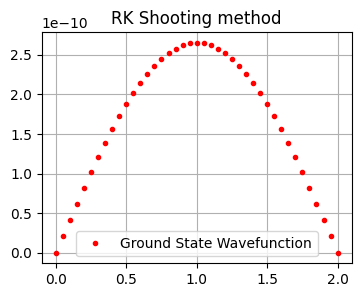


The unnormalised wavefunction for particles in a 1D box is shown below.
This figure shows the ground state first excited state


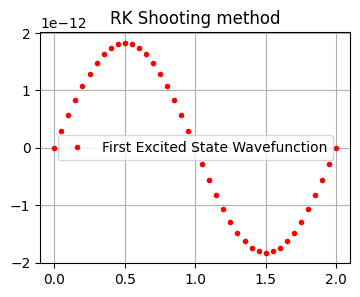

In [12]:


#NOW WE COME TO BOUNDARY VALUE PROBLEMS
# def shooting_method(d2ydx2, dydx, x0, y0, xf, yf, z_guess1, z_guess2, step_size, tol=1e-6):

# second order function
def d2ydt2_1(t, y, z):
    return -(math.pi**2)*y/4

# first order function z = dy/dt
def d2ydt2_2(t, y, z):
    return -(math.pi**2)*y

# z = dy/dt
def dydt(t, y, z):
    return z

# Define boundary values
x_initial = 0
x_final = 2

y_initial = 0
y_final = 0


# Calling shooting method for ground state
print("The unnormalised wavefunction for particles in a 1D box is shown below.")
print("This figure shows the ground state wavefunction.")
x, y, z = RK4_2ord_shooting_method(d2ydt2_1, dydt, x_initial, y_initial, x_final, y_final, -2, 10, step_size=0.05)

# Plotting ground state
plt.figure(figsize=(4,3))
plt.plot(x,y,'r.',label='Ground State Wavefunction')
plt.title('RK Shooting method')
plt.grid()
plt.legend()
plt.show()



# Calling shooting method for first excited state
print("\nThe unnormalised wavefunction for particles in a 1D box is shown below.")
print("This figure shows the ground state first excited state")
x, y, z = RK4_2ord_shooting_method(d2ydt2_2, dydt, x_initial, y_initial, x_final, y_final, -2, 10, step_size=0.05)

# Plotting first excited state
plt.figure(figsize=(4,3))
plt.plot(x,y,'r.',label='First Excited State Wavefunction')
plt.title('RK Shooting method')
plt.grid()
plt.legend()
plt.show()


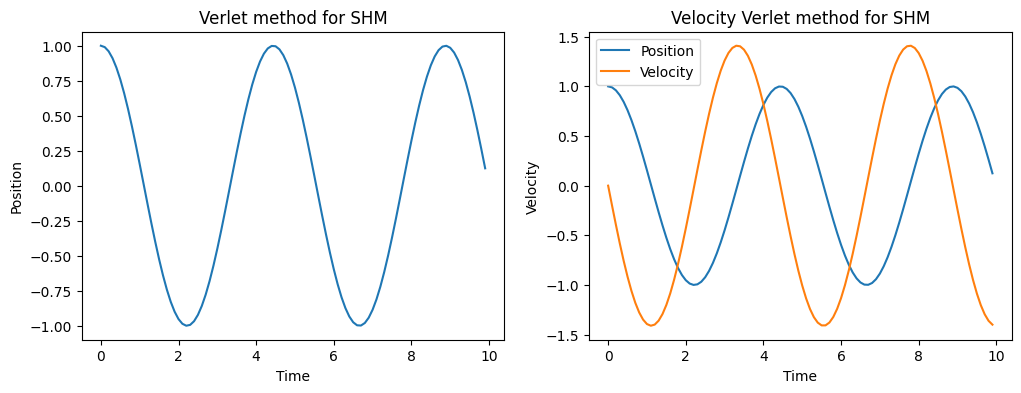

In [13]:
#verlet - 2nd order ODE solver for initial value problems  
#RMEMBER: here, there is no term of first order derivative in the equation in the question

# Example function representing acceleration
def acceleration(x):
    # Example: Simple harmonic oscillator
    k = 2.0  # Spring constant
    m = 1.0  # Mass
    return -k * x / m

# Set the initial conditions
initial_position = 1.0
initial_velocity = 0.0
dt = 0.1
num_steps = 100

# Use the Verlet method to calculate the positions
T, X = verlet(acceleration, initial_position, initial_velocity, dt, num_steps)

# Plot the positions as a function of time
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(T, X)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Verlet method for SHM')



# Example initial conditions
initial_position = 1.0
initial_velocity = 0.0
time_step = 0.1
num_steps = 100

# Use velocity_verlet function to simulate motion
time, positions, velocities = velocity_verlet(acceleration, initial_position, initial_velocity, time_step, num_steps)

# Plot the phase space diagram
plt.subplot(1, 2, 2)
plt.plot(time, positions, label='Position')
plt.plot(time, velocities, label='Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()
plt.title('Velocity Verlet method for SHM')

plt.show()

-9.979999999999876


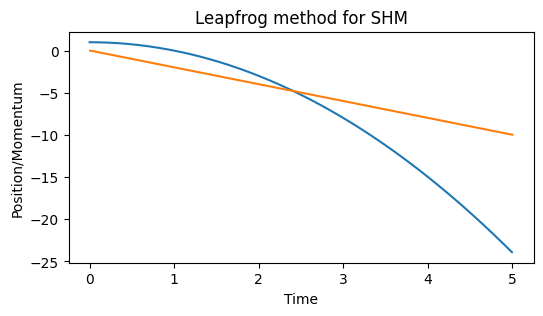

In [14]:
# Example force function
#RMEMBER: here, there is no term of first order derivative in the equation in the question

def force(t):
    # Example: Simple harmonic oscillator force
    k = 2.0  # Spring constant
    return -k

# Example initial conditions
initial_position = 1.0
initial_momentum = 0.0
time_step = 0.01
final_time = 5.0

# Use leapfrogn function to simulate motion
time_positions, time_momenta, positions, momenta, final_momentum = leap_frog(force, initial_position, initial_momentum, time_step, final_time)

print(final_momentum)

# Plot the phase space diagram
plt.figure(figsize=(6,3))
# plt.subplot(1, 2, 1)
plt.plot(time_positions, positions, label='Position')
plt.plot(time_momenta, momenta, label='Momentum')
plt.xlabel('Time')
plt.ylabel('Position/Momentum')
plt.title('Leapfrog method for SHM')

plt.show()

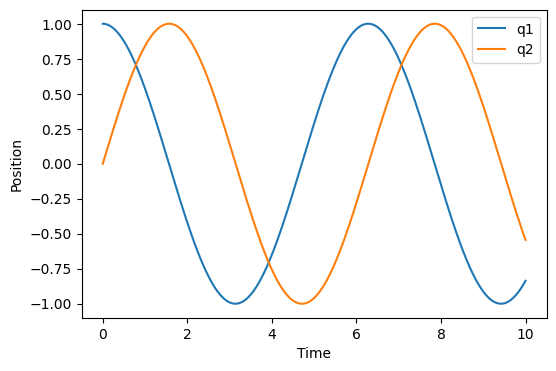

In [15]:
# Example usage:
# Define your Hamiltonian and its gradient
def hamiltonian(q, p): ## H(q, p)
    return 0.5 * dot_product(p, p) + 0.5 * dot_product(q, q)

def gradient_hamiltonian(q):  ## \del H/\del q
    return q

# Set initial conditions and integration parameters
q0 = [1.0, 0.0]
p0 = [0.0, 1.0]
num_steps = 1000
step_size = 0.01

# Perform symplectic Euler integration
q_values, p_values = symplectic_euler(hamiltonian, gradient_hamiltonian, q0, p0, num_steps, step_size)

# Plot the results
time_values = [i * step_size for i in range(num_steps + 1)]
plt.figure(figsize=(6,4))
plt.plot(time_values, [qi[0] for qi in q_values], label='q1')
plt.plot(time_values, [qi[1] for qi in q_values], label='q2')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

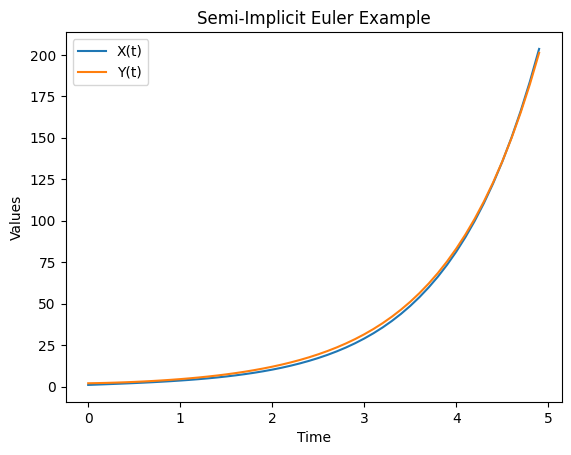

In [16]:

# Example functions (replace with your own)
def funct1(t, y):  # dy/dt = y - t
    return y - t

def funct2(t, x):  # dx/dt = x + t
    return x + t

# Initial values
x0 = 1.0
y0 = 2.0
dt = 0.1
num_steps = 50

# Run the simulation
time_values, X, Y = semi_implicit_euler(funct1, funct2, x0, y0, dt, num_steps)

# Plot the results
plt.plot(time_values, X, label='X(t)')
plt.plot(time_values, Y, label='Y(t)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.title('Semi-Implicit Euler Example')
plt.show()


# PDEs

Solution: [[0.         0.385      0.24333333 ... 0.01679485 0.01669654 0.01659881]
 [0.395      0.5675     0.61833333 ... 0.03356504 0.03336857 0.03317326]
 [0.78       0.84625    0.9225     ... 0.05028598 0.04999164 0.04969902]
 ...
 [0.78       0.84625    0.9225     ... 0.05028598 0.04999164 0.04969902]
 [0.395      0.5675     0.61833333 ... 0.03356504 0.03336857 0.03317326]
 [0.         0.385      0.24333333 ... 0.01679485 0.01669654 0.01659881]]


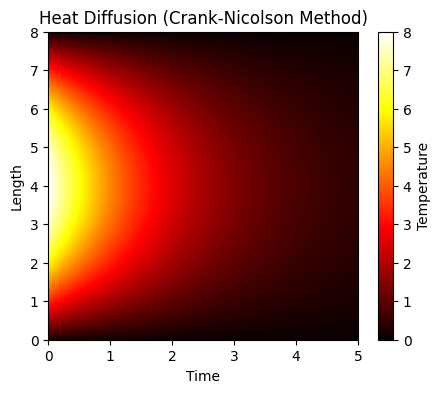

In [17]:
def init_cond(x):
    return 4*x - x**2/2

def plot_diff():
    plt.figure(figsize=(5, 4))
    plt.imshow(solution, extent=[0, T, 0, L], aspect='auto', origin='lower', cmap='hot')
    plt.colorbar(label='Temperature')
    plt.title('Heat Diffusion (Crank-Nicolson Method)')
    plt.xlabel('Time')
    plt.ylabel('Length')

L = 8.0         # Length of the rod
T = 5.0         # Total time  take any value
dx = 0.1        # Spatial step size
dt = 0.01       # Time step size
Diff = 4       # Thermal diffusivity

solution, spatial_grid, time_grid = crank_nicolson_heat_diffusion(L, T, dx, dt, Diff, init_cond)

# Tabulate the solution
print(f"Solution: {solution}")

# Plot the diffusion equation solution
plot_diff()
plt.show()


In [18]:
def func_top_bound(x):
    return x*np.exp(1)
def func_bottom_bound(x):
    return x
def func_left_bound(y):
    return 0
def func_right_bound(y):
    return 2*np.exp(y)

def source_func(x,y):
    return x*np.exp(y)


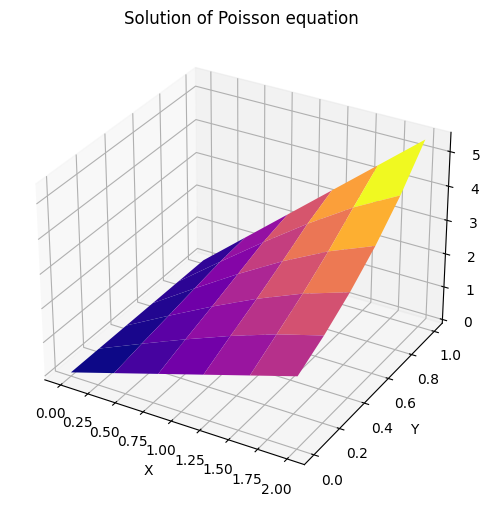

In [19]:
X, Y, Sol = poisson_solver(0,2,0,1,6, func_left_bound, func_right_bound, func_bottom_bound, func_top_bound, source_func)
Title='Solution of Poisson equation'
plot_3D_surface(X,Y,Sol,Title)
plt.show()


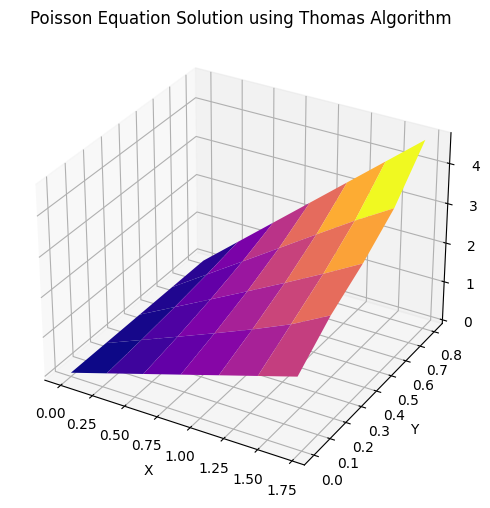

In [20]:

def get_BC_poisson_thomas(n_x, n_y, x, y):

    # Initial guess
    u = [ [ 0 for j in range(n_y)] for i in range(n_x)]

    # Apply boundary conditions
    for j in range(n_y):
        u[0][j] = 0
        u[-1][j] = 2 * math.exp(y[j])

    for i in range(n_x):
        u[i][0] = x[i]
        u[i][-1] = x[i] * math.exp(1)

    return u


# Set parameters
n_x = 6
n_y = 4
x_length = 2.0
y_length = 1.0

# Solve Poisson equation with boundary conditions
X, Y, u = poisson_thomas_solver(n_x, n_y, x_length, y_length, get_BC_poisson_thomas)

Title = 'Poisson Equation Solution using Thomas Algorithm'

plot_3D_surface(X, Y, u, Title)
plt.show()


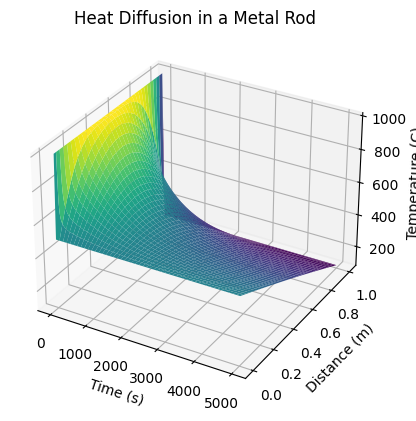

In [22]:
####################################################################################################
# Solving heat diffusion for a metal rod using finite difference method
# when it is heated initially to a uniform temperature of 1000 C.
# It's ends are then cooled by keeping in contact with two reservoirs at 100 C and 500 C.
####################################################################################################

# Constants and parameters
L = 1.0  # length of the rod
T_initial = 1000.0  # initial temperature
T_left = 500.0  # temperature at the left end
T_right = 100.0  # temperature at the right end
alpha = 1e-4  # thermal diffusivity
dt = 0.1  # time step
dx = 0.01  # spatial step
duration = 5000  # total simulation time

# Discretization
Nx = int(L / dx) + 1
Nt = int(duration / dt) + 1
x_values = np.linspace(0, L, Nx)
t_values = np.linspace(0, duration, Nt)

# Initialize temperature array
T = np.zeros((Nt, Nx))

# Initial condition
T[0, :] = T_initial

# Boundary conditions
T[:, 0] = T_left
T[:, -1] = T_right

# Finite difference method
for n in (range(0, Nt - 1)):
    for i in range(1, Nx - 1):
        T[n + 1, i] = T[n, i] + alpha * dt / dx**2 * (T[n, i + 1] - 2 * T[n, i] + T[n, i - 1])

# Create a 3D surface plot
X, T_values = np.meshgrid(x_values, t_values)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T_values, X, T, cmap='viridis')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Distance (m)')
ax.set_zlabel('Temperature (C)')
ax.set_title('Heat Diffusion in a Metal Rod')
plt.show()


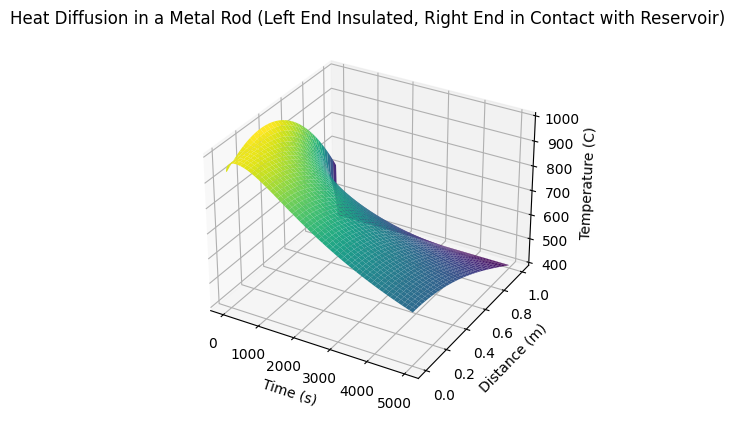

In [23]:
####################################################################################################
# Solving heat diffusion for a metal rod using finite difference method
# when it is heated initially to a custom initial condition.
# Here an initial condition is specified as a quadratic function as
# T(x, 0) = -800 * (x - 0.6)**2 + 1000
# One of its end is then isolated and the other end is cooled by keeping in contact with 
# reservoir at 100 C, so that heat loss happens through one end only.
####################################################################################################

# Constants and parameters
L = 1.0  # length of the rod
T_reservoir = 400
alpha = 1e-4  # thermal diffusivity
dt = 0.1  # time step
dx = 0.01  # spatial step
duration = 5000  # total simulation time

# Discretization
Nx = int(L / dx) + 1
Nt = int(duration / dt) + 1
x_values = np.linspace(0, L, Nx)
t_values = np.linspace(0, duration, Nt)

# Initialize temperature array with the specified quadratic initial condition
T = np.zeros((Nt, Nx))
T[0, :] = -800 * (x_values - 0.3)**2 + 1000

# Boundary conditions
T[:, -1] = T_reservoir  # Right end in contact with the reservoir
T[:, 0] = T[:, 1]  # Insulated left end

# Finite difference method
for n in (range(0, Nt - 1)):
    for i in range(1, Nx - 1):
        T[n + 1, i] = T[n, i] + alpha * dt / dx**2 * (T[n, i + 1] - 2 * T[n, i] + T[n, i - 1])

    # Maintain the temperature at the insulated left end
    T[n + 1, 0] = T[n, 1]

# Create a 3D surface plot
X, T_values = np.meshgrid(x_values, t_values)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T_values, X, T, cmap='viridis')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Distance (m)')
ax.set_zlabel('Temperature (C)')
ax.set_title('Heat Diffusion in a Metal Rod (Left End Insulated, Right End in Contact with Reservoir)')
plt.show()
